In [4]:
#Import packages

import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib.pyplot as plt

from scipy.stats import fisher_exact

from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt

import seaborn as sns
import os
import scipy.stats as stats

pandas 1.5.2
numpy 1.23.5


In [5]:
#upload files genomic data + dms results
df_gen_file = r"change_mutation_table_anna_2024.xlsx" 
df_dms_file = r"Supplementary data 3 - Selection coefficient CaErg11.xlsx" 
df_gen = pd.read_excel(df_gen_file, header=0)
df_dms = pd.read_excel(df_dms_file, header=0)

df_dms.rename(columns={'Variant': 'variant'}, inplace=True)

#add the log2
df_gen["F_log2"] = np.log2(df_gen["F_mut_alleles"])

#subset
df_dms = df_dms[df_dms['WT amino acid'] != df_dms['Variant amino acid']]
df_gen_flz = df_gen[df_gen["Antifungal"]=="Fluco"]
df_dms_flz = df_dms[df_dms["Antifungal"]=="Fluco"]
df_dms_ctrl = df_dms[df_dms["Antifungal"]=="Control"]
df_dms_ctrl.rename(columns={'Category': 'Category control cond'}, inplace=True)
df_dms_flz.rename(columns={'Category': 'Category fluconazole cond'}, inplace=True)
df_dms_ctrl = df_dms_ctrl[df_dms_ctrl["Category control cond"]!="Beneficial"]

#merge dms and genomic data
df_gen1 = df_gen_flz.merge(df_dms_flz[['variant', 'Category fluconazole cond']], on='variant', how='left').dropna()
df_gen1 = df_gen1.merge(df_dms_ctrl[['variant', 'Category control cond']], on='variant', how='left').dropna()

df_gen1 = df_gen1.drop(columns=['Antifungal'])

df_gen1

C:\Users\CABED117\AppData\Local\Temp\ipykernel_19136\280357891.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dms_ctrl.rename(columns={'Category': 'Category control cond'}, inplace=True)
C:\Users\CABED117\AppData\Local\Temp\ipykernel_19136\280357891.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dms_flz.rename(columns={'Category': 'Category fluconazole cond'}, inplace=True)


,variant,N_mut,N_mut_hets,N_mut_homs,N_mut_alleles,N_all,N_all_alleles,F_mut,F_mut_alleles,F_log2,Category fluconazole cond,Category control cond
0,72L,1,0,1,2,435,870,0.002299,0.002299,-8.764872,Deleterious,Neutral
1,114S,9,0,9,18,435,870,0.020690,0.020690,-5.594947,Neutral,Neutral
2,114V,3,0,3,6,435,870,0.006897,0.006897,-7.179909,Deleterious,Neutral
3,116E,180,117,63,243,435,870,0.413793,0.279310,-1.840059,Beneficial,Neutral
4,123I,19,1,18,37,435,870,0.043678,0.042529,-4.555418,Beneficial,Neutral
5,126L,2,0,2,4,435,870,0.004598,0.004598,-7.764872,Beneficial,Neutral
6,128T,39,28,11,50,435,870,0.089655,0.057471,-4.121015,Neutral,Neutral
7,129A,18,15,3,21,435,870,0.041379,0.024138,-5.372554,Deleterious,Neutral
8,132H,34,1,33,67,435,870,0.078161,0.077011,-3.698782,Beneficial,Neutral
9,143R,3,2,1,4,435,870,0.006897,0.004598,-7.764872,Beneficial,Neutral


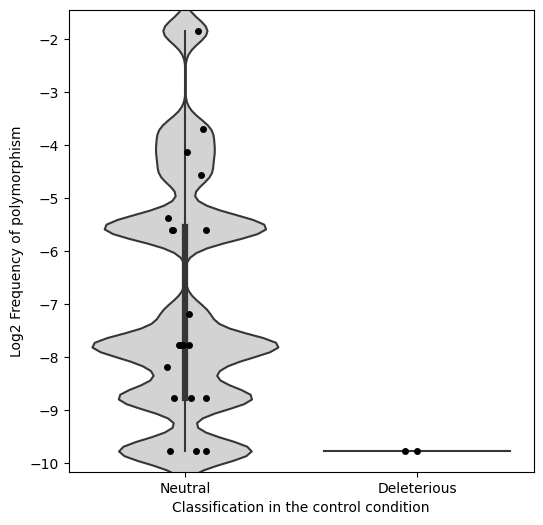

In [7]:
# Create the boxplot for F_mut_alleles control cond

pala = sns.color_palette(['#D3D3D3','#417471'],n_colors=2)

plt.figure(figsize=(6, 6))
sns.violinplot(x='Category control cond', y='F_log2',palette = pala,scale='width', bw=0.1,data=df_gen1)
sns.stripplot(x='Category control cond', y='F_log2', jitter=True, color="black",data=df_gen1)
plt.title("")
plt.xlabel('Classification in the control condition')
plt.ylabel('Log2 Frequency of polymorphism')

name1 = "c albicans polymorphism"
plt.savefig(f"c:{name1}.png", format='png', dpi=300)
plt.savefig(f"c:{name1}.svg", format='svg', transparent=True, dpi=300, bbox_inches='tight')